In [20]:
from sklearn.cluster import DBSCAN
from clustering_package.model.dbscan import DBSCAN as DBSCAN2

from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import silhouette_score, adjusted_rand_score

In [13]:
X, y = make_moons(n_samples=1000, noise=0.05)

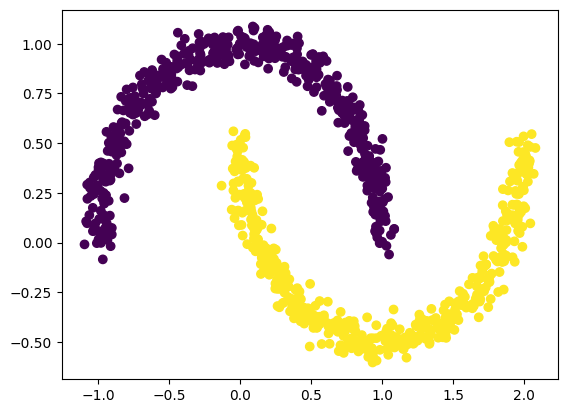

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [15]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True, title=""):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    annomalies_mask = (dbscan.labels_ == -1)
    non_core_mask = ~core_mask & ~annomalies_mask

    cores = dbscan.components_
    non_cores = X[non_core_mask]
    anomalies = X[annomalies_mask]

    plt.scatter(cores[:, 0], cores[:, 1], s=size, c=dbscan.labels_[core_mask],
                marker='o', cmap='Paired')
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}, {title}")
    plt.grid()
    plt.gca().set_axisbelow(True)

In [8]:
dbscan = DBSCAN(eps=0.2)
dbscan.fit(X)

DBSCAN(eps=0.2)

In [22]:
dbscan2 = DBSCAN2(eps=0.2, min_samples=5)
dbscan2.fit(X)

count = np.isin(dbscan2.core_sample_indices_, dbscan.core_sample_indices_).sum()
print(count)

1000


Sklearn.KMeans: 0.33488402163982994
KMeans: 0.33488402163982994


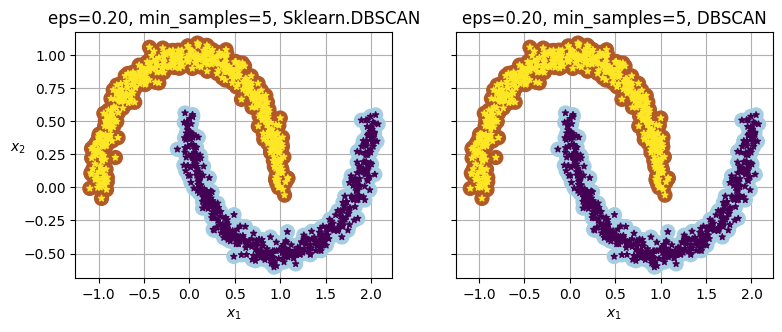

In [33]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100, title="Sklearn.DBSCAN")

plt.subplot(122)
plot_dbscan(dbscan2, X, size=100, show_ylabels=False, title="DBSCAN")

print(f"Sklearn.KMeans: {silhouette_score(X, dbscan.fit_predict(X))}")
print(f"KMeans: {silhouette_score(X, dbscan2.fit_predict(X))}")

In [32]:
print(f"Sklearn.KMeans: {silhouette_score(X, dbscan.fit_predict(X))}")
print(f"KMeans: {silhouette_score(X, dbscan2.fit_predict(X))}")

Sklearn.KMeans: 0.33488402163982994
KMeans: 0.33488402163982994


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score
from clustering_package.metrics import silhouette_score as silhouette_score2

In [21]:
data = load_wine()
X = data.data
y_true = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [23]:
db = DBSCAN(eps=1, min_samples=5)
labels = db.fit_predict(X_scaled)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

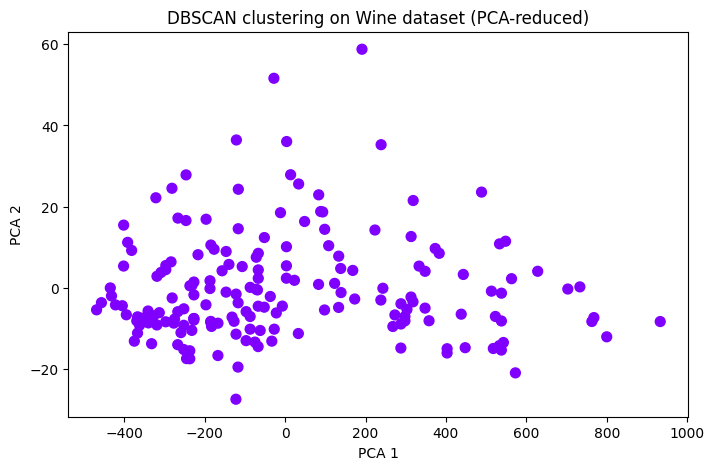

In [19]:
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow', s=50)
plt.title("DBSCAN clustering on Wine dataset (PCA-reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [5]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable


In [6]:
!pip install ../dist/clustering_package-0.1.0.tar.gz

Defaulting to user installation because normal site-packages is not writeable
Processing d:\sourcecode\ml_learning\clustering-package\clustering_package\dist\clustering_package-0.1.0.tar.gz
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for clustering_package: filename=clustering_package-0.1.0-py3-none-any.whl size=9566 sha256=1b283209339bb98df9337a35af3262e3c607170ef7c2d461dbfe3ababbead412
  Stored in directory: c:\users\hiep\appdata\local\pip\cache\wheels\0b\bc\c4\f61c34f1bf10187de44baa952deec07537a4df2954cd7680e5
Successfully built clustering_package
  Attempting uninstall: clustering_package
    Found existing installation: clustering_package 0.1.0
    Uninstalling clustering_package-0.1.0:
      Successfully uninstalled clustering_package-0.1.0
